# Split the data into train and test data sets

The test data set should have enough data to allow for a good check of the models performance.

With one million of data I am tempted to use a 90/10 train/test split, leaving 100k jobs to test the models performance on. But based on the EDA there are some very unneven levels of categories and I want to make sure there are enough examples of each in the test set.

The primary point of concern will be the `major` column:

- Because jobs with a label of `NONE` far outnumber any one of the other values that `major` can take on, this could cause issues when splitting with smaller test sizes.
- There may not be enough values in the test set for each value type in this variable to confidently test on; this will need some quick validation before moving on.

___

Try out 3 splits with different `test_sizes`:
- 85/15
- 90/10
- 95/5

visualize the distributions after and decide which split volume will be used for modeling.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from src.data_split import test_split, visualize_split


random_state = 42  # Set random_state for the splitting

In [2]:
all_data = pd.read_csv("../data/interim/salaries_train_all.csv", index_col = 0)

# Drop zero salary outliers
zero_indices = all_data.loc[all_data.salary == 0, :].index
all_data.drop(zero_indices, inplace = True)

# Drop the companyId column as it won't be used in the model
all_data.drop(columns = "companyId", inplace = True)
all_data.head()

,jobId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Distributions before the split

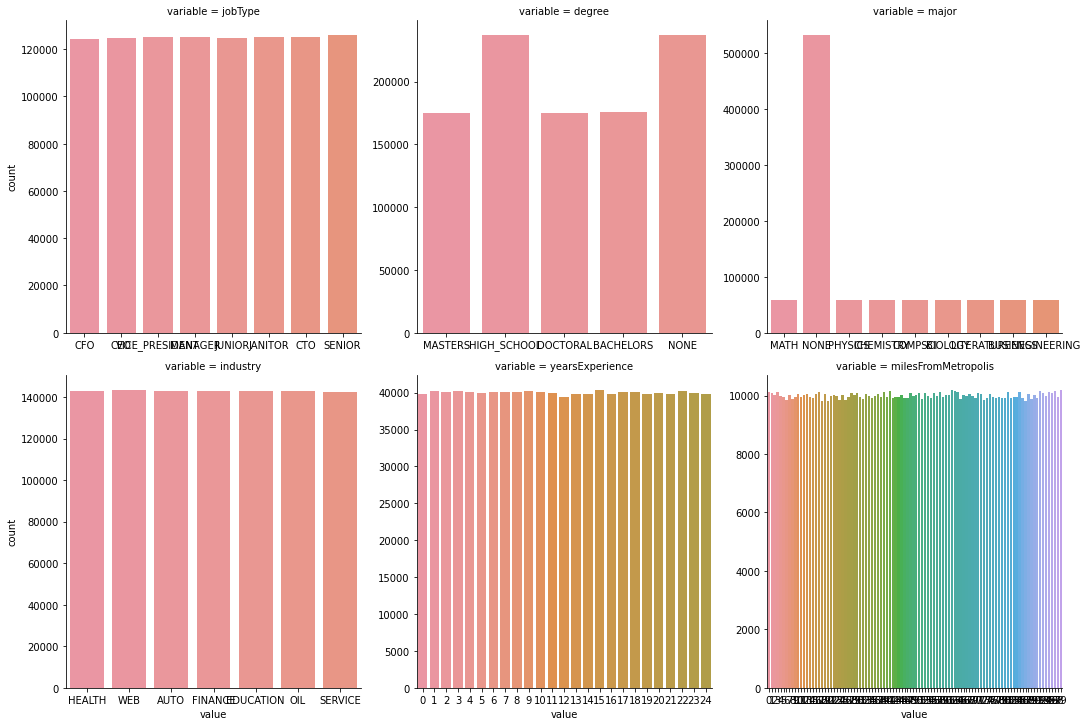

In [3]:
visualize_split(all_data)

# 85/15 Split

------------------------------
TRAIN DATA shape: (849995, 7)
TRAIN DATA distributions


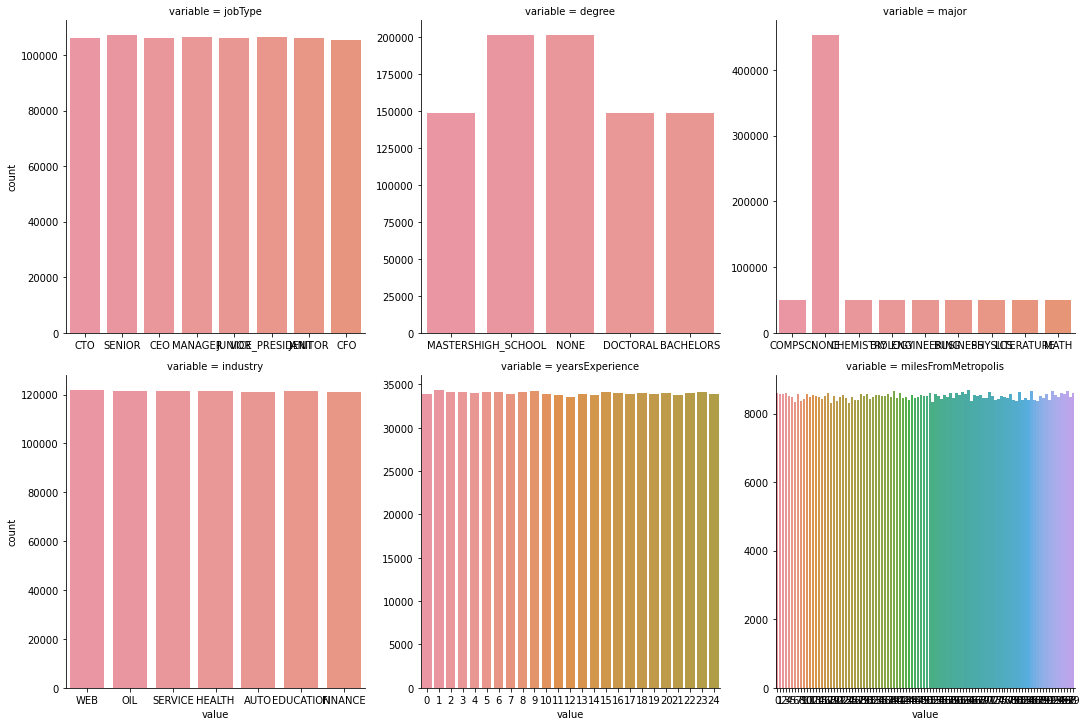

TRAIN DATA: Value counts for 'major' column:
NONE           452504
CHEMISTRY       50051
LITERATURE      49906
ENGINEERING     49769
BIOLOGY         49762
COMPSCI         49700
BUSINESS        49624
PHYSICS         49547
MATH            49132
Name: major, dtype: int64
------------------------------
TEST DATA shape: (150000, 7)
TEST DATA distributions


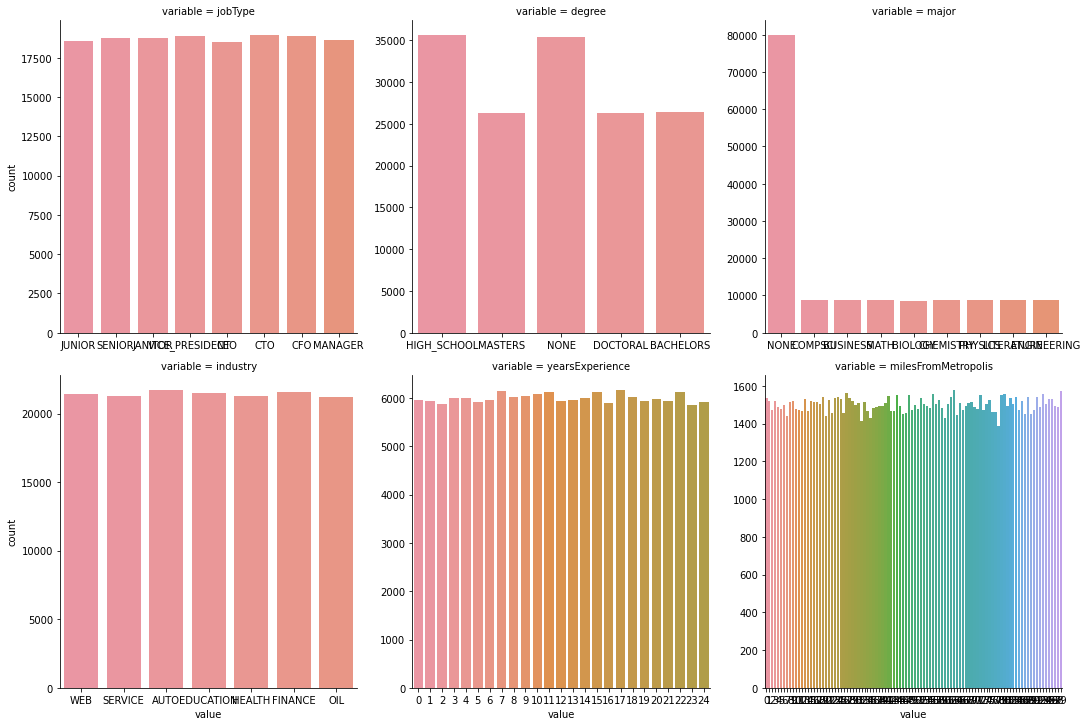

TEST DATA: Value counts for 'major' column:
NONE           79849
BUSINESS        8894
PHYSICS         8863
ENGINEERING     8825
CHEMISTRY       8824
LITERATURE      8778
COMPSCI         8682
MATH            8668
BIOLOGY         8617
Name: major, dtype: int64


In [5]:
test_split(all_data, test_size = 0.15, random_state = random_state)

# 90/10 Split

------------------------------
TRAIN DATA shape: (899995, 7)
TRAIN DATA distributions


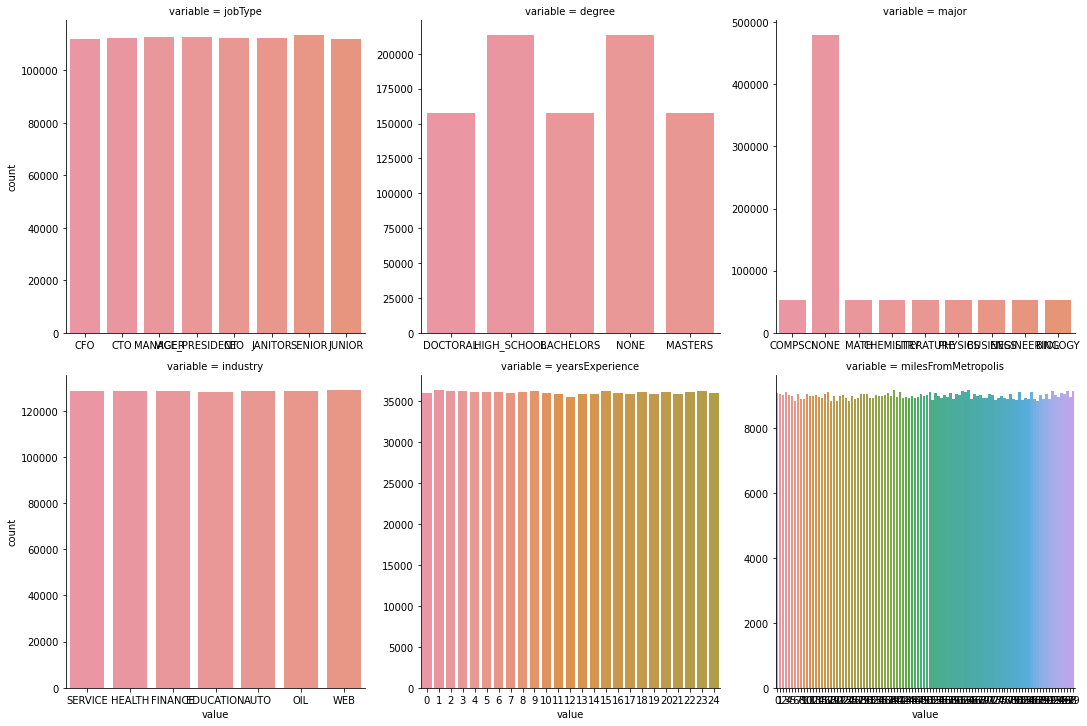

TRAIN DATA: Value counts for 'major' column:
NONE           479154
CHEMISTRY       53006
LITERATURE      52794
ENGINEERING     52766
BIOLOGY         52709
COMPSCI         52534
BUSINESS        52519
PHYSICS         52512
MATH            52001
Name: major, dtype: int64
------------------------------
TEST DATA shape: (100000, 7)
TEST DATA distributions


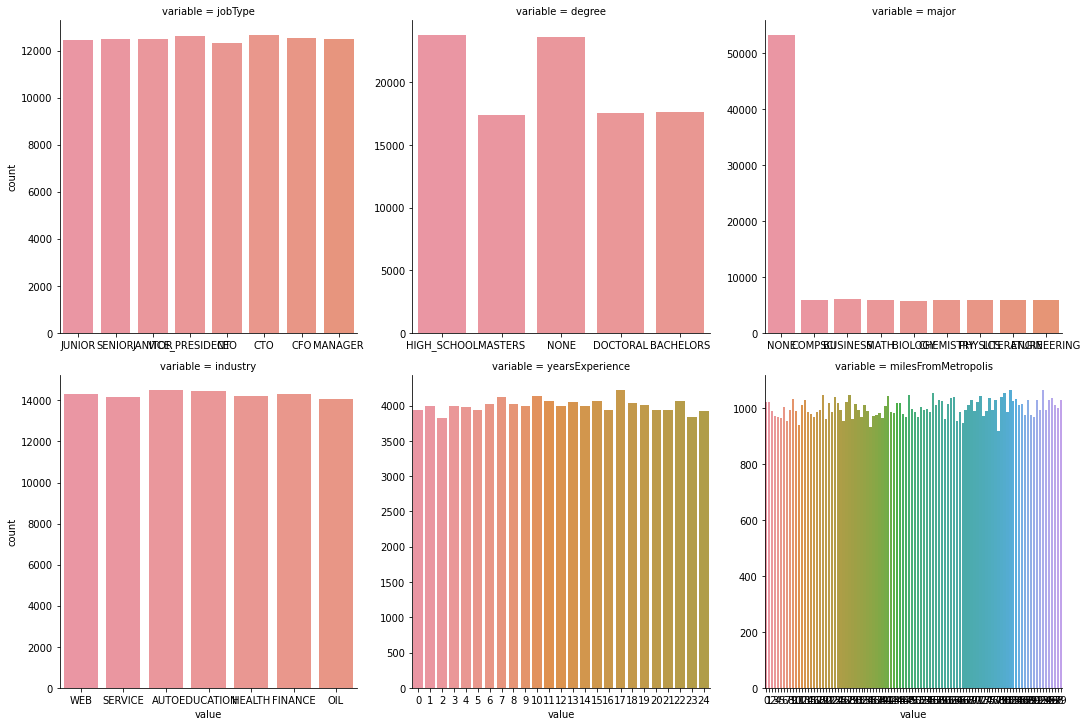

TEST DATA: Value counts for 'major' column:
NONE           53199
BUSINESS        5999
PHYSICS         5898
LITERATURE      5890
CHEMISTRY       5869
COMPSCI         5848
ENGINEERING     5828
MATH            5799
BIOLOGY         5670
Name: major, dtype: int64


In [6]:
test_split(all_data, test_size = 0.10, random_state = random_state)

# 95/5 Split

------------------------------
TRAIN DATA shape: (949995, 7)
TRAIN DATA distributions


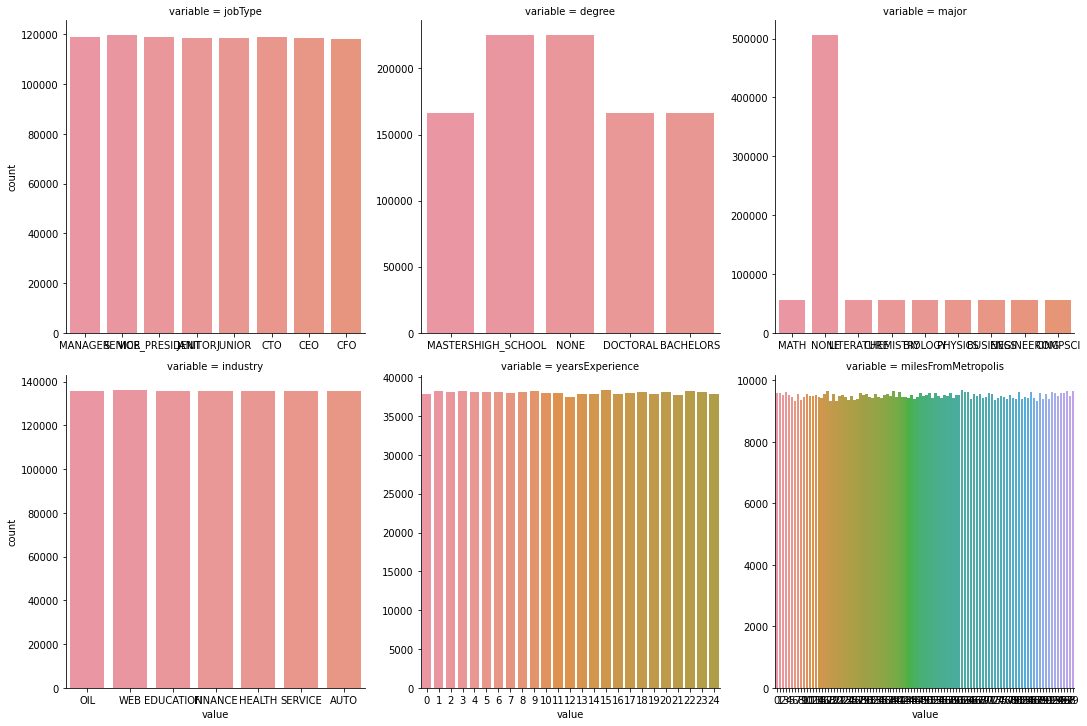

TRAIN DATA: Value counts for 'major' column:
NONE           505739
CHEMISTRY       55947
LITERATURE      55738
ENGINEERING     55609
BIOLOGY         55594
BUSINESS        55562
PHYSICS         55481
COMPSCI         55422
MATH            54903
Name: major, dtype: int64
------------------------------
TEST DATA shape: (50000, 7)
TEST DATA distributions


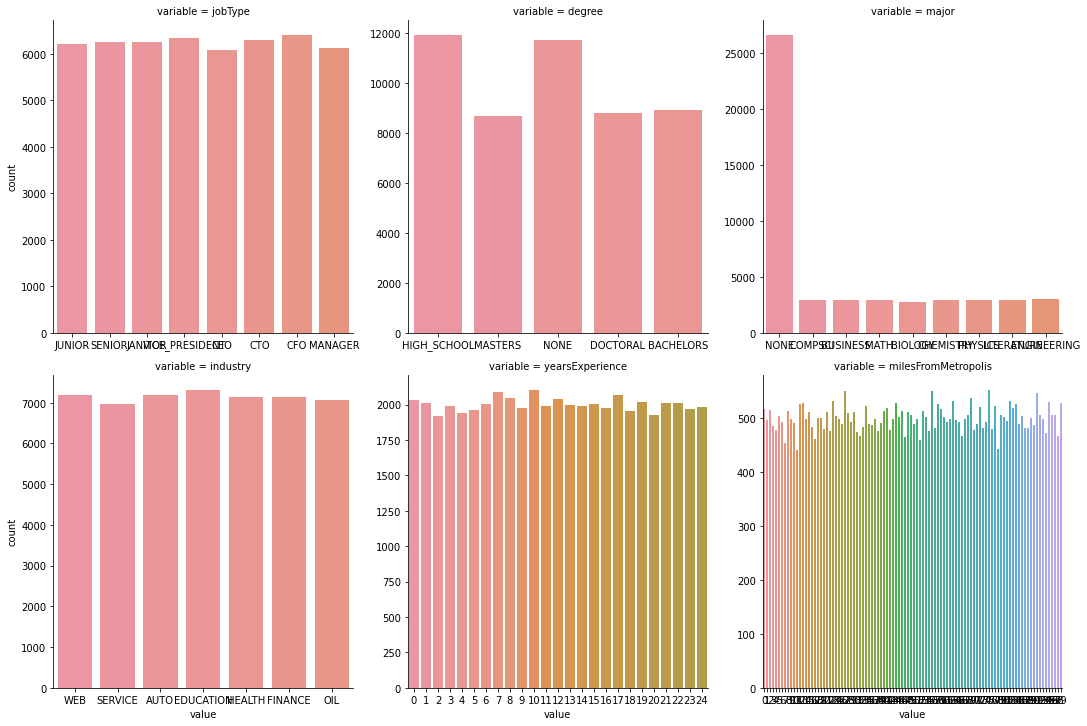

TEST DATA: Value counts for 'major' column:
NONE           26614
ENGINEERING     2985
COMPSCI         2960
BUSINESS        2956
LITERATURE      2946
PHYSICS         2929
CHEMISTRY       2928
MATH            2897
BIOLOGY         2785
Name: major, dtype: int64


In [7]:
test_split(all_data, test_size = 0.05, random_state = random_state)

# Conclusion and saving data sets

**85/15** training/test split looks to be the most reasonable.

___

Having a 5% test size leaves ~3k examples of each `major`. When thinking about the different dimensions of the data and dividing those examples up into different `jobTypes` and other variables, I don't think this is a reasonable amount of data to test on.
- in a similar way, I don't think the 90/10 split I was originally thinking would be optimal either. ~6k examples of each `major` is also a bit low to be confident in the models results. 

Going with 15% test set size here still allows for 850k samples for training/cross-validation and almost 9k examples in the test set for each `major` type. This should be sufficient for testing purposes.


In [8]:
data_train, data_test = train_test_split(all_data, test_size = 0.15, random_state = random_state)

In [9]:
data_train.to_csv("../data/interim/salaries_train_85_15_split.csv")
data_test.to_csv("../data/interim/salaries_test_85_15_split.csv")